# 딥러닝 LSTM 주가 예측 


### 2018 FinanceData.KR

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)

# 주가를 가져와 엑셀로 저장하기

In [2]:
import pandas_datareader as pdr

df = pdr.DataReader('005930.KS', 'yahoo', '2017-01-01', '2017-12-31')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,1799000.0,1812000.0,1794000.0,1805000.0,1788812.750,93012
2017-01-03,1814000.0,1831000.0,1801000.0,1824000.0,1807642.250,147153
2017-01-04,1825000.0,1826000.0,1805000.0,1808000.0,1791785.750,159435
2017-01-05,1803000.0,1803000.0,1777000.0,1778000.0,1762054.875,219349
2017-01-06,1809000.0,1822000.0,1802000.0,1810000.0,1793767.875,177619
2017-01-09,1830000.0,1875000.0,1828000.0,1861000.0,1844310.500,263898
2017-01-10,1864000.0,1870000.0,1854000.0,1862000.0,1845301.500,181996
2017-01-11,1876000.0,1928000.0,1871000.0,1914000.0,1896835.250,240363
2017-01-12,1900000.0,1940000.0,1899000.0,1940000.0,1922602.125,233383


In [4]:
# 거래량이 없는 날 (한국 휴일)

df[df['Volume'] <= 0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-26,2681000.0,2681000.0,2681000.0,2681000.0,2673737.25,0
2018-01-02,2548000.0,2548000.0,2548000.0,2548000.0,2548000.00,0


In [4]:
# 거래량이 없는 날(한국 휴일) 제외

df = df[df['Volume'] > 0]

In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,1799000.0,1812000.0,1794000.0,1805000.0,1788812.750,93012
2017-01-03,1814000.0,1831000.0,1801000.0,1824000.0,1807642.250,147153
2017-01-04,1825000.0,1826000.0,1805000.0,1808000.0,1791785.750,159435
2017-01-05,1803000.0,1803000.0,1777000.0,1778000.0,1762054.875,219349
2017-01-06,1809000.0,1822000.0,1802000.0,1810000.0,1793767.875,177619
2017-01-09,1830000.0,1875000.0,1828000.0,1861000.0,1844310.500,263898
2017-01-10,1864000.0,1870000.0,1854000.0,1862000.0,1845301.500,181996
2017-01-11,1876000.0,1928000.0,1871000.0,1914000.0,1896835.250,240363
2017-01-12,1900000.0,1940000.0,1899000.0,1940000.0,1922602.125,233383


In [7]:
# 엑셀 파일로 저장

df.to_excel('A005930_2017.xlsx')

# 엑셀 파일 읽기

In [8]:
import pandas as pd

df = pd.read_excel('A005930_2017.xlsx', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,1799000,1812000,1794000,1805000,1788812.750,93012
2017-01-03,1814000,1831000,1801000,1824000,1807642.250,147153
2017-01-04,1825000,1826000,1805000,1808000,1791785.750,159435
2017-01-05,1803000,1803000,1777000,1778000,1762054.875,219349
2017-01-06,1809000,1822000,1802000,1810000,1793767.875,177619


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2017-01-02 to 2017-12-28
Data columns (total 6 columns):
Open         240 non-null int64
High         240 non-null int64
Low          240 non-null int64
Close        240 non-null int64
Adj Close    240 non-null float64
Volume       240 non-null int64
dtypes: float64(1), int64(5)
memory usage: 13.1 KB


# 종가, 거래량 차트


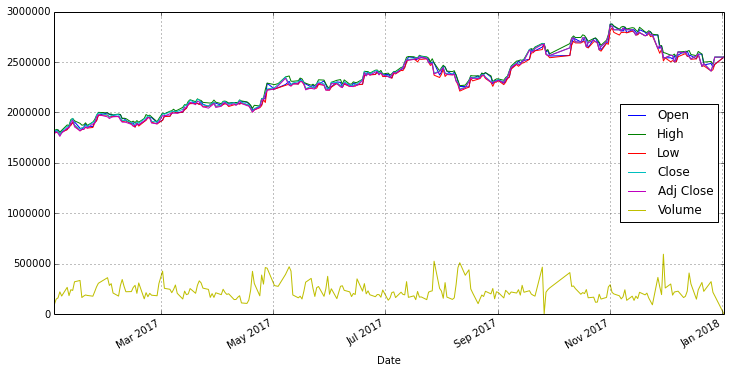

In [3]:
df.plot()

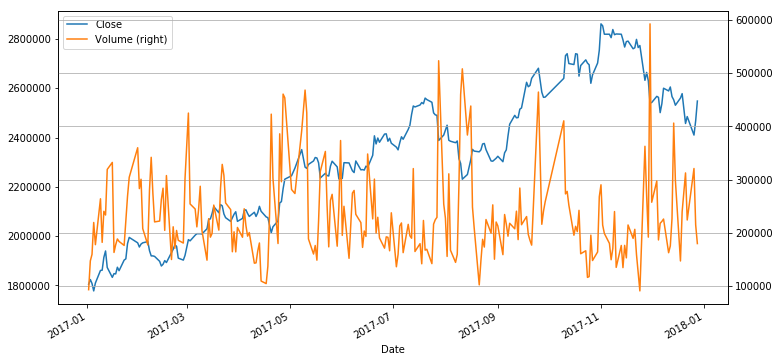

In [11]:
df[['Close', 'Volume']].plot(secondary_y='Volume')

# 데이터 정규화

In [9]:
df_norm =  (df - df.min()) / (df.max()-df.min())

df_norm.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.000000,0.008388,0.016023,0.024931,0.024349,0.004558
2017-01-03,0.013941,0.026095,0.022620,0.042475,0.041483,0.112418
2017-01-04,0.024164,0.021435,0.026390,0.027701,0.027054,0.136886
2017-01-05,0.003717,0.000000,0.000000,0.000000,0.000000,0.256246
2017-01-06,0.009294,0.017707,0.023563,0.029548,0.028858,0.173112
2017-01-09,0.028810,0.067102,0.048068,0.076639,0.074850,0.344996
2017-01-10,0.060409,0.062442,0.072573,0.077562,0.075751,0.181832
2017-01-11,0.071561,0.116496,0.088596,0.125577,0.122645,0.298110
2017-01-12,0.093866,0.127679,0.114986,0.149584,0.146092,0.284204


In [13]:
df_norm.values

array([[ 0.        ,  0.0083877 ,  0.01602262,  0.02493075,  0.02434869,
         0.00455814],
       [ 0.01394052,  0.02609506,  0.02262017,  0.04247461,  0.04148285,
         0.11241755],
       [ 0.02416357,  0.02143523,  0.0263902 ,  0.02770083,  0.02705401,
         0.13688568],
       ..., 
       [ 0.63754647,  0.65424045,  0.59660697,  0.58356417,  0.58960644,
         0.45835018],
       [ 0.60315985,  0.62907735,  0.60885957,  0.63711911,  0.64238433,
         0.24732697],
       [ 0.63104089,  0.694315  ,  0.65786993,  0.710988  ,  0.71518141,
         0.17727543]])

In [14]:
dataX = [] # 입력: Sequence Data
dataY = [] # 출력: Tragetn Data

In [15]:
seq_length = 20 # 1개 시퀀스의 길이 (시계열 입력 개수)

for i in range(0, len(df_norm) - seq_length):
    _x = df_norm[i:i+seq_length].values
    _y = [df_norm['Close'][i + seq_length]] # 다음날 주가(정답)
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

In [16]:
dataX[0]

array([[ 0.        ,  0.0083877 ,  0.01602262,  0.02493075,  0.02434869,
         0.00455814],
       [ 0.01394052,  0.02609506,  0.02262017,  0.04247461,  0.04148285,
         0.11241755],
       [ 0.02416357,  0.02143523,  0.0263902 ,  0.02770083,  0.02705401,
         0.13688568],
       [ 0.00371747,  0.        ,  0.        ,  0.        ,  0.        ,
         0.25624603],
       [ 0.00929368,  0.01770736,  0.02356268,  0.02954755,  0.02885767,
         0.17311175],
       [ 0.02881041,  0.06710158,  0.04806786,  0.07663897,  0.07484962,
         0.3449963 ],
       [ 0.06040892,  0.06244175,  0.07257304,  0.07756233,  0.07575139,
         0.18183158],
       [ 0.07156134,  0.11649581,  0.08859566,  0.1255771 ,  0.12264523,
         0.29811001],
       [ 0.09386617,  0.1276794 ,  0.11498586,  0.14958449,  0.14609214,
         0.28420449],
       [ 0.09851301,  0.10531221,  0.09048068,  0.0877193 ,  0.08567125,
         0.45494752],
       [ 0.04089219,  0.08201305,  0.03675778,  0.

In [3]:
dataY[:10]

[[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0]]

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

# 랜덤시드 지정
tf.set_random_seed(0)

# 가격 데이터를 읽어 엑셀로 저장 (3년)
#df = pdr.DataReader('009150.KS', 'yahoo', '2015-01-01', '2017-12-31')
#df = df[df['Volume'] > 0]
#df.to_excel('A009150_2010_2017.xlsx')

# 엑셀로 부터 데이터 가격 읽어, 데이터 min/max 정규화
df1 = pd.read_excel('test_bak.xlsx', index_col='date')
print("df len",len(df1))
df = df1[:-17]

print("df len",len(df))

df2 = df1[len(df1)-20:]

print("df len",len(df2))
print("df len",df2)

df_norm =  (df - df.min()) / (df.max()-df.min())
df_norm.head(10)
df_norm.values

print(df_norm[['a','b','c','d','e','f','g','h','j','k','l','m']])
dataX = [] # 입력: Sequence Data
dataY = [] # 출력: Tragetn Data

seq_length = 5 # 1개 시퀀스의 길이 (시계열 입력 개수)

for i in range(0, len(df_norm) - seq_length):
    _x = [df_norm[['a','b','c','d','e','f','g','h','j','k','l','m']][i:i+seq_length]]
    _y = [df_norm['Target'][i + seq_length]] # 다음날 주가(정답)
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가
    
dataX[:10]
dataY[:10]

df len 2987
df len 2970
df len 17
df len                  a       b       c       d         e       f       g      h  \
date                                                                          
2018-01-02  327.00  326.60  327.50  325.45  0.001225  133406  254891  -4800   
2018-01-03  328.20  328.00  329.10  327.25  0.000610  137675  257230  -6367   
2018-01-04  325.50  329.95  330.15  325.05 -0.013487  230871  256103 -13559   
2018-01-05  329.45  326.50  329.70  326.25  0.009035  165076  253875   2104   
2018-01-08  331.75  331.40  332.65  329.25  0.001056  224607  251726  -5816   
2018-01-09  330.95  331.20  333.50  329.45 -0.000755  223104  251867   2398   
2018-01-10  328.35  331.85  331.95  328.05 -0.010547  260461  251916  -3990   
2018-01-11  327.00  328.20  328.85  326.00 -0.003656  229121  253443  -2337   
2018-01-12  327.35  327.80  328.20  325.10 -0.001373  202736  255223  -4789   
2018-01-15  327.80  329.00  329.75  327.05 -0.003647  146464  254289    881   
2018-01-16 

[[0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0]]

# 전체 코드

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

# 랜덤시드 지정
tf.set_random_seed(0)

# 가격 데이터를 읽어 엑셀로 저장 (3년)
#df = pdr.DataReader('009150.KS', 'yahoo', '2015-01-01', '2017-12-31')
#df = df[df['Volume'] > 0]
#df.to_excel('A009150_2010_2017.xlsx')

# 엑셀로 부터 데이터 가격 읽어, 데이터 min/max 정규화
#df = pd.read_excel('test_bak.xlsx', index_col='date')

df1 = pd.read_excel('test_bak.xlsx', index_col='date')
print("df len",len(df1))
#df = df1[:-17]
df = df1

print("df len",len(df))

df2 = df1[len(df1)-20:]

df_norm =  (df - df.min()) / (df.max()-df.min())


# 하이퍼 파라미터
seq_length = 20 # 1개 시퀀스의 길이 (시계열 입력 개수)
input_data_column_cnt = 13  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수
rnn_cell_hidden_dim = 40   # 각 셀의 (hidden)출력 크기
num_stacked_layers = 3     # stacked LSTM layers 개수
epoch_num = 1000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01           # 학습률

# 입력, 출력 데이터
dataX = [] # 입력: Sequence Data
dataY = [] # 출력: Tragetn Data

for i in range(0, len(df_norm) - seq_length):
    _x = df_norm[i:i+seq_length].values
    #_x = [df_norm[['a','b','c','d','e','f','g','h','j','k','l','m']][i:i+seq_length]]
    _y = [df_norm['Target'][i + seq_length]] # 다음날 주가 (정답)
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가
    
#cross validation
train_size = int(len(dataY) * 0.95) # 학습용 70%
test_size = len(dataY) - train_size # 나머지(30%) 테스트용

# 학습용 데이터로 나누기
trainX = dataX[0:train_size]
trainY = dataY[0:train_size]
 
# 테스트용 데이터로 나누기
testX = dataX[train_size:len(dataX)]
testY = dataY[train_size:len(dataY)]
 
# 플레이스홀더 생성
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
Y = tf.placeholder(tf.float32, [None, 1])
 
# 측정지표를 산출하기 위한 targets, predictions
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
 
# 모델 (LSTM 네트워크) 생성
def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, activation=tf.nn.softsign)
    return cell
 
# Stacked RNNs 생성
stacked_rnn = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stacked_rnn, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()
 
# 셀들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)
 
# LSTM RNN의 마지막 (hidden)출력만을 사용
# 최근 가격들(n)을 이용하여 다음날 주가(1) 예측하므로 MANY-TO-ONE 이다.
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)
 
# cost function
loss = tf.reduce_sum(tf.square(hypothesis - Y))

# 최적화함수로 AdamOptimizer를 사용
optimizer = tf.train.AdamOptimizer(learning_rate)
 
train = optimizer.minimize(loss)
 
# RMSE(Root Mean Square Error)
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))
 
train_error_summary = [] # 학습 데이터의 오류 저장
test_error_summary = []  # 테스트 데이터의 오류 저장
test_predict = None        # 테스트용데이터로 예측한 결과
 

df len 2987
df len 2987
hypothesis:  Tensor("rnn/transpose:0", shape=(?, 5, 20), dtype=float32)


In [2]:
epoch_num = 1000            # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01           # 학습률
# 세션시작, 초기화    
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
# 학습 시작
start_time = datetime.datetime.now() # 시작시간을 기록
print('학습 시작...')

for epoch in range(epoch_num):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num - 1): # 100번째마다 또는 마지막 epoch 경우
        # 학습 데이터 rmse오차
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트 데이터 rmse오차
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오차 출력
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        

elapsed_time = datetime.datetime.now() - start_time
print('elapsed_time:', elapsed_time) # 학습 경과시간
print('elapsed_time per epoch:', elapsed_time/epoch_num) # 에포크당 시간

학습 시작...
epoch: 100, train_error(A): 0.4995661973953247, test_error(B): 0.5006815791130066, B-A: 0.0011153817176818848
epoch: 200, train_error(A): 0.4988618791103363, test_error(B): 0.49793365597724915, B-A: -0.0009282231330871582
epoch: 300, train_error(A): 0.4968865215778351, test_error(B): 0.49325862526893616, B-A: -0.0036278963088989258
epoch: 400, train_error(A): 0.49229663610458374, test_error(B): 0.5023702383041382, B-A: 0.010073602199554443
epoch: 500, train_error(A): 0.4877021312713623, test_error(B): 0.5186275243759155, B-A: 0.030925393104553223
epoch: 600, train_error(A): 0.4743383526802063, test_error(B): 0.5733768939971924, B-A: 0.09903854131698608
epoch: 700, train_error(A): 0.4567001461982727, test_error(B): 0.5845122933387756, B-A: 0.12781214714050293
epoch: 800, train_error(A): 0.4223152697086334, test_error(B): 0.581933319568634, B-A: 0.1596180498600006
epoch: 900, train_error(A): 0.399487167596817, test_error(B): 0.5817126035690308, B-A: 0.18222543597221375
epoch: 10

# 내일 종가 예측

In [3]:
# 최근 데이터를 입력(feed)
results = []
results2 = []
results3 = []

c = 0
for i in range(20, 0, -1):
    recent_data = [df_norm.iloc[len(df_norm)-seq_length-i:len(df_norm)-i, :input_data_column_cnt].values]
    predict = sess.run(hypothesis, feed_dict={X: recent_data})
    print("predict", i, predict[0])
    results.append(predict[0]) 
#     if predict[0] - c > 0 :
    if predict[0] > 0.5 :
        results2.append("1") 
    else:
        results2.append("0")  
    results3.append(predict[0] - c)

    c = predict[0] 

#print(results2)
#print(df2['Target'])
# print(results3)

s = 0
sum = 0
for i in range(0,20):    
    if str(df2['Target'][i]) == results2[i]:
        print(abs(df2['a'][i]-df2['b'][i]))
        sum += abs(df2['a'][i]-df2['b'][i])*50
    else:
        sum -= abs(df2['a'][i]-df2['b'][i])*50

print("sum : ",sum)
#     if str(df2['Target'][i]) == str(results2[i]):       
#         print(results2[i])
#     print(sum)
#     sum = sum + results3[i]*500000



predict 20 [ 0.29213196]
predict 19 [ 0.4970445]
predict 18 [ 0.31171507]
predict 17 [ 0.06390343]
predict 16 [ 0.54120243]
predict 15 [ 0.11447825]
predict 14 [-0.14267284]
predict 13 [-0.08465437]
predict 12 [ 0.04011038]
predict 11 [ 0.09308932]
predict 10 [ 0.35230517]
predict 9 [ 0.42977077]
predict 8 [ 0.91864836]
predict 7 [ 0.43453208]
predict 6 [ 0.13954218]
predict 5 [ 0.16793548]
predict 4 [ 0.41616693]
predict 3 [ 0.90818012]
predict 2 [ 0.93278432]
predict 1 [ 0.3227911]
1.85
0.2
4.45
0.25
3.5
1.2
0.45
0.25
1.4
0.3
3.6
sum :  -110.0


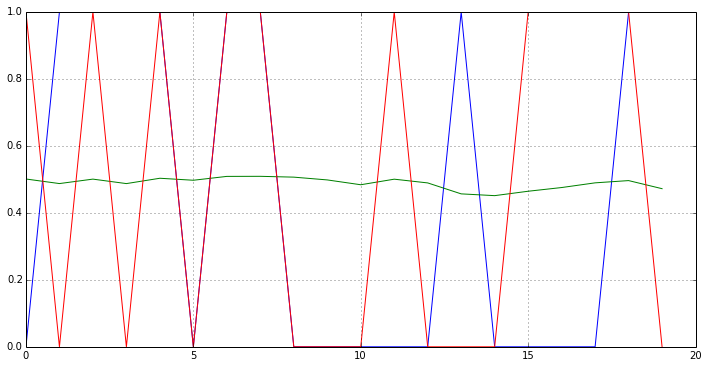

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(df2['Target'])
plt.plot(results)
plt.plot(results2)

In [3]:
 
# 최근 데이터를 입력(feed)
#recent_data = [df_norm[len(df_norm)-seq_length:].values]
#print("recent_data", recent_data)

#
#print(df2)
len_df2 = len(df2)
print(len_df2)

seq_length = 5
for i in range(0, len(df2)): 
    #print(df2['Target'][i])     
    recent_data = [df_norm[len(df_norm)-len(df2)+i:len(df_norm)-len(df2)+i+seq_length].values]
    #print("recent_data", recent_data)
    predict = sess.run(hypothesis, feed_dict={X: recent_data})    
    print("real", df2['Target'][i])     
    print("predict", predict[0])

    
# recent_data = [df_norm[len(df_norm)-seq_length:].values]
# predict = sess.run(hypothesis, feed_dict={X: recent_data})    
# print("predict", predict[0])


#predict = sess.run(hypothesis, feed_dict={X: recent_data})
#print("predict", predict[0])

# 역정규화
#predict_price = predict[0] * (df['Close'].max() - df['Close'].min())  + df['Close'].min()
#print("predict stock price", predict_price[0]) # 예측 주가 출력

17
real 1
predict [ 0.4518429]
real 1
predict [ 0.49355102]
real 0
predict [ 0.45449412]
real 1
predict [ 0.46017283]
real 1
predict [ 0.45913851]
real 0
predict [ 0.45409417]
real 0
predict [ 0.40675682]
real 0
predict [ 0.46316355]
real 0
predict [ 0.44875008]
real 0
predict [ 0.44999141]
real 1
predict [ 0.43802118]
real 0
predict [ 0.41976249]
real 0
predict [ 0.44470948]


ValueError: Cannot feed value of shape (1, 4, 13) for Tensor 'Placeholder:0', which has shape '(?, 5, 13)'

In [5]:
df = pdr.DataReader('009150.KS', 'yahoo', '2018-01-02', '2018-01-02')
df['Close']

Date
2018-01-02         NaN
2018-01-03    100000.0
Name: Close, dtype: float64

# 결과 그래프 출력

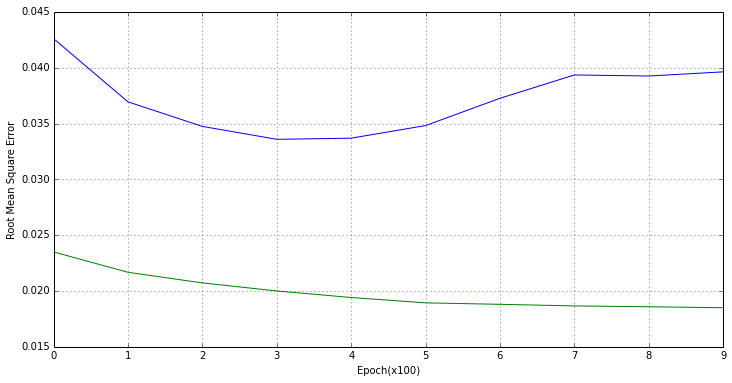

In [9]:
plt.plot(train_error_summary, 'g')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
plt.show()

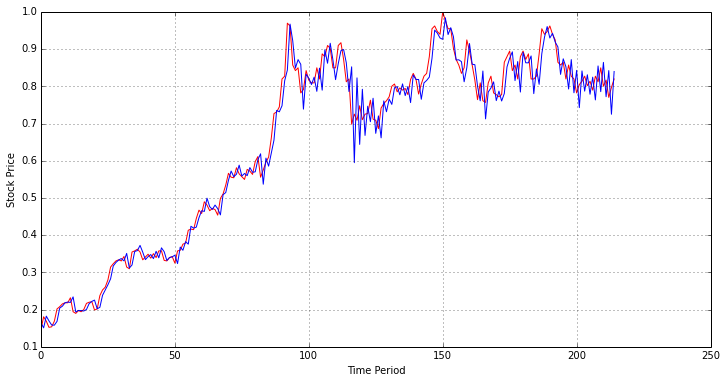

In [10]:
plt.plot(testY, 'r')
plt.plot(test_predict, 'b')
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.show()

### 2018 FinanceData.KR